In [2]:
#Libraries
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
from scipy import stats

warnings.filterwarnings('ignore')

In [3]:
os.chdir('/Volumes/PtatoBasket/ACIML/Outputs/Sheets_of_ML/')
dd=pd.read_excel(r'ML5.1-WinterM3.xlsx',sheet_name='Sheet1')
dd.head()

,PBLH,WindDirection-850,MeanWind-850,RH,V-850,SMOKE-AOD,DUST-AOD,AI,PrecipitableVapour,LTS,Nd,CloudRadius,LWP,CTP,CTT,COT
0,1107.338501,296.973938,8.940419,68.097881,0.252336,0.294114,0.091265,0.428236,5.97825,14.470398,4.606432,19.5550,38.75,180.025003,213.597495,2.3025
1,1003.519739,287.963684,6.776600,48.865718,0.216081,0.188035,0.056755,0.272499,5.61750,14.056030,4.876295,15.8750,33.75,195.075003,212.932495,2.1775
2,1007.765564,295.633606,7.982339,55.579012,0.413700,0.216712,0.058319,0.320124,5.70200,14.458069,1.891741,19.6475,26.75,191.150003,212.562495,1.1050
3,989.690564,287.751892,6.168521,40.228288,0.255902,0.164280,0.047872,0.242393,4.75125,13.997009,3.975170,15.3150,24.75,217.525003,215.072495,1.0500
4,1039.771802,288.574707,8.425652,61.552186,-0.165191,0.361265,0.081095,0.560568,4.02100,15.216766,8.161980,17.8775,106.75,388.150006,235.624995,3.0800


2.0
34.5
63.0
216.25


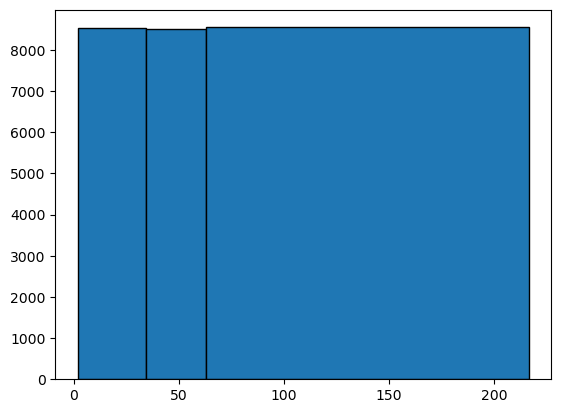

In [4]:
DATA=dd
# DATA=DATA.loc[DATA.LWP<2=0]

# DATA=DATA.loc[DATA.LWP>20]
# DATA=DATA.loc[DATA.LWP<80]


DATA=DATA[(np.abs(stats.zscore(DATA)) < 3).all(axis=1)]
data=DATA['LWP']
bins=3

def equalObs(x,nBin):
    nlen=len(x)
    return np.interp(np.linspace(0,nlen,nBin+1),
                     np.arange(nlen),
                     np.sort(x))
    
n, bins, patches = plt.hist(data,equalObs(data,bins), edgecolor='black')
for i in range(0,len(bins)):
    print(float(bins[i]))

plt.show()

In [22]:
max(DATA.LWP)

173.25

In [23]:
# from scipy import stats
# df=DATA.loc[:,~DATA.columns.isin(['Unnamed: 0'])]
# # DATA=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

bin=list(bins)
# bin=[20.0, 30.0, 45.0, 75.0, 250.0]
# # bin=[1.0, 16.0, 21.0, 25.0, 30.0, 35.0, 42.0, 53.0, 72.0, 105.0, 249.0]
labels=['A','B','C']
DATA['LWPG'] = pd.cut(x = DATA['LWP'], bins = bin, labels = labels, include_lowest = True)
DATA=DATA[DATA['LWPG'].notna()]
DATA.head()
# DATA['LWPG'] = pd.qcut(DATA['LWP'], q=4, precision=1, labels=labels)

,PBLH,WindDirection-850,MeanWind-850,RH,V-850,SMOKE-AOD,DUST-AOD,AI,PrecipitableVapour,LTS,Nd,CloudRadius,LWP,CTP,CTT,COT,LWPG
0,929.749805,287.576355,4.266716,21.915994,0.007169,0.084029,0.063011,0.120130,3.36825,14.974854,75.475395,12.157500,18.75,966.075014,298.912493,5.2750,A
1,673.311951,299.485138,2.038934,39.769445,0.042830,0.178943,0.062189,0.264394,3.63400,14.449463,8.852759,21.277500,26.75,859.750013,289.337494,1.0975,A
2,760.868958,276.430023,4.836355,61.380281,-0.049294,0.127585,0.057322,0.185613,4.83600,14.227356,2.913222,23.539999,42.00,348.725005,238.294995,1.0350,B
3,724.208728,283.306366,9.374429,33.209657,0.058580,0.177522,0.054197,0.276685,3.24450,14.011322,45.087664,11.557500,9.75,739.425011,279.204994,1.3950,A
4,724.625391,280.441315,9.143348,35.340314,0.082056,0.189754,0.065570,0.297507,3.05550,13.792267,25.081423,13.180000,10.75,698.350010,274.169994,0.9150,A


In [24]:
DATA.to_excel('ML5.1-PreMonM3C.xlsx')

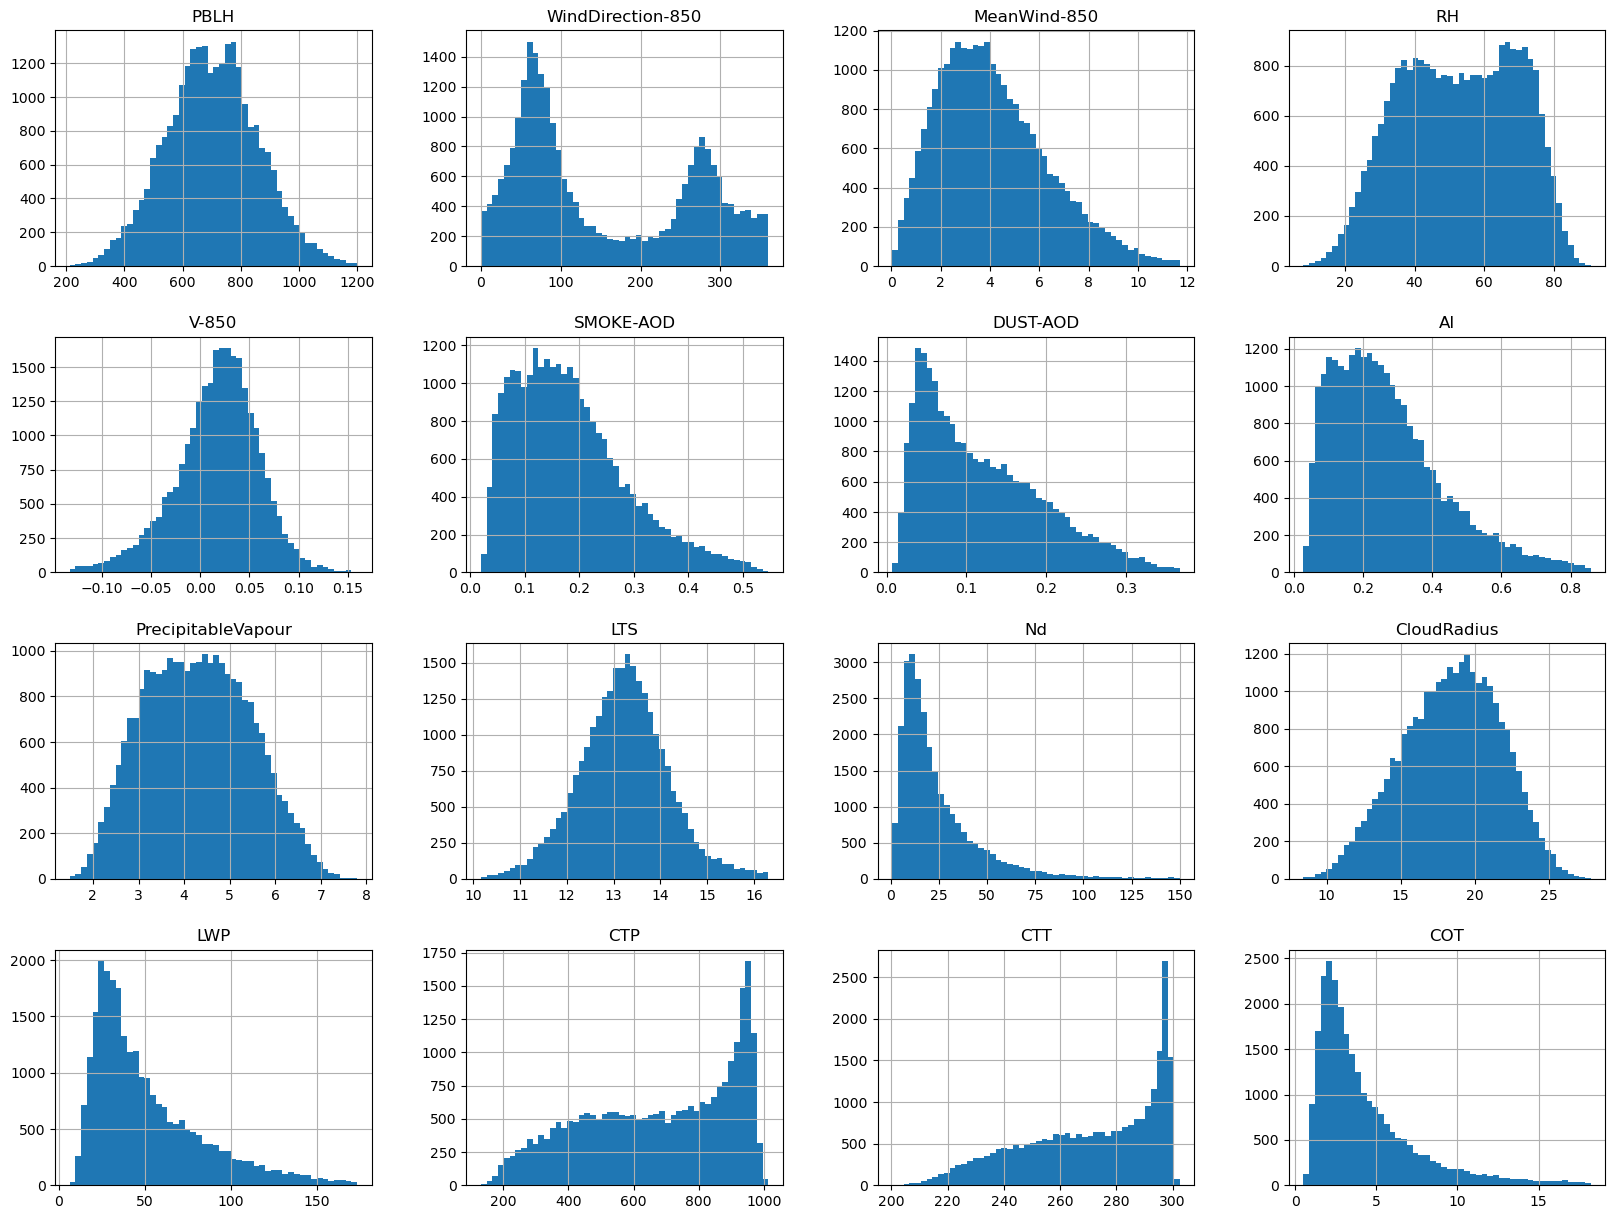

In [25]:
import matplotlib.pyplot as plt
DATA.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
%%script echo skipping

from sklearn.model_selection import train_test_split

# #Loading Data
# os.chdir('/Volumes/PtatoBasket/ACIML/Outputs/Sheets_of_ML/')
# DATA=pd.read_excel(r'ML5.1-PreMonM3C.xlsx',sheet_name='Sheet1')

# a=DATA.LWP.quantile(.35)
# b=DATA.LWP.quantile(.75)
# DATA=DATA.loc[DATA.LWP>a]
# DATA=DATA.loc[DATA.LWP<b]


y=pd.Series(DATA.LWPG)
X=DATA.loc[:,~DATA.columns.isin(['LWP','LWPG','Unnamed: 0','Unnamed: 0.1'])]#Select Everything Other than LWP
# X=DATA.loc[:,~DATA.columns.isin(['LWP','LWPG','Unnamed: 0','Unnamed: 0.1','CTP','CTT','COT','CloudRadius'])]#Select Everything Other than LWP

#Split dataset into training set and test set
X_train,X_test_whole,y_train,y_test_whole=train_test_split(X,y,test_size=0.3, random_state=42)#70% training and 30% test
X_testA,X_testB,y_testA,y_testB=train_test_split(X_test_whole,y_test_whole,test_size=0.5, random_state=42)#15% and 15%  for 2 fold verification

#Create RandomForest Regressor objec
from sklearn.ensemble import RandomForestClassifier
myModel=RandomForestClassifier()


from sklearn import metrics

#Training
model=myModel.fit(X_train,y_train)
#Testing
y_pred=model.predict(X_testA)
print(metrics.accuracy_score(y_testA, y_pred))

y_pred=model.predict(X_testB)
print(metrics.accuracy_score(y_testB, y_pred))


skipping


In [5]:
os.chdir('/Volumes/PtatoBasket/ACIML/Outputs/Sheets_of_ML/')
DATA=pd.read_excel(r'ML5.1-WinterM3C2.xlsx',sheet_name='Sheet1')
DATA.LWPG.unique()

array(['B', 'D', 'A', 'C'], dtype=object)